#**MOVIE RECOMMENDATION SYSTEM USING HYBRID AI**

# Introduction

A hybrid movie recommendation system is a type of artificial intelligence (AI) system that combines two different approaches to generate personalized movie recommendations for users. The system integrates both non-symbolic AI and symbolic AI techniques to improve its accuracy and effectiveness. Non-symbolic AI, such as the TF-IDF algorithm, focuses on statistical analysis of large data sets to identify patterns and correlations. Symbolic AI, on the other hand, relies on knowledge representation and logical reasoning to make inferences and generate recommendations. By combining these two approaches, the hybrid system can overcome some of the limitations of each method and provide more accurate and relevant movie recommendations to users.

# IMPORT LIBRARIES

In [ ]:
# Importing all the necessary libraries
import pandas as pd
from ast import literal_eval
import re
from collections.abc import Iterable
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import requests
from IPython.display import display, HTML
!pip install Pillow
from PIL import Image
import io
from io import BytesIO
!pip install cairosvg
import cairosvg
from tabulate import tabulate
!pip install nbconvert[webpdf]
import warnings
warnings.filterwarnings('ignore')

# KNOWLEDGE ACQUISTION
The knowledge acquisition process of the movie dataset used in this project was gotten from this "[The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)", and involved extracting valuable information from the collected data through various techniques. This included analyzing movie attributes such as genres, taglines, overviews, vote_average, and user ratings to gain insights into movie characteristics and user preferences. Additionally, the dataset was subjected to feature engineering to derive meaningful features for the recommendation system. This knowledge acquisition enabled the system to capture and represent the relevant information needed for accurate and effective movie recommendations.

In [ ]:
# Reading all the dataset files into their respective pandas dataframe
movie_data = pd.read_csv('movies_metadata.csv', low_memory = False)
keyword_data = pd.read_csv('keywords.csv')
credit_data = pd.read_csv('credits.csv', low_memory = False)
links_data = pd.read_csv('links_small.csv')
rating_data = pd.read_csv('ratings_small.csv')

# KNOWLEDGE VALIDATION
The knowledge validation process on the movie dataset involved several steps to ensure the accuracy, reliability, and consistency of the acquired knowledge. This included cross-referencing information from multiple sources to identify any inconsistencies or discrepancies. Data quality checks were performed to detect and rectify errors or missing values. The dataset was also validated against domain expertise and existing knowledge to ensure its alignment with established standards. Additionally, statistical analysis and outlier detection techniques were applied to identify any anomalies in the data. By conducting thorough knowledge validation, the integrity of the movie dataset was ensured, enhancing the reliability of the knowledge-based system's recommendations.

### "movies_metadata.csv" dataset

In [ ]:
# Displaying the overall summary of the 'movie_data' dataframe
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# Listing top 5 rows in the 'movie_data' dataframe
movie_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# Dropping redundant columns like 'belongs_to_collection','homepage','video' and displaying the overall summary
# movie_data.drop(['belongs_to_collection','homepage', 'video'], axis=1, inplace=True)
movie_data.drop(['belongs_to_collection','homepage', 'video'], axis=1, inplace=True)
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45461 non-null  object 
 9   poster_path           45080 non-null  object 
 10  production_companies  45463 non-null  object 
 11  production_countries  45463 non-null  object 
 12  release_date          45379 non-null  object 
 13  revenue               45460 non-null  float64
 14  runtime               45203 non-null  float64
 15  spoken_languages   

In [ ]:
# Counting and displaying the number of null values in each column
number_of_null = movie_data.isnull().sum()
print(number_of_null)

adult                       0
budget                      0
genres                      0
id                          0
imdb_id                    17
original_language          11
original_title              0
overview                  954
popularity                  5
poster_path               386
production_companies        3
production_countries        3
release_date               87
revenue                     6
runtime                   263
spoken_languages            6
status                     87
tagline                 25054
title                       6
vote_average                6
vote_count                  6
dtype: int64


In [ ]:
# Was facing issue when handling missing values in 'popularity' column.
# The error was TypeError: could not convert string to float: 'Beware Of Frost Bites'
# Mostly the 'popularity' column has float like values
# So this section was included to check whether there are other type of values in the column and print them
def check_float(value):
    try:
        float(value)
        return False
    except ValueError:
        return True
not_float_values = movie_data[movie_data['popularity'].apply(check_float)]
not_float_list = not_float_values['popularity'].tolist()
print(not_float_list)

['Beware Of Frost Bites']


In [ ]:
# Removing the record with 'Beware of Frost Bites' value in its 'popularity' column
movie_data = movie_data[movie_data['popularity'] != 'Beware Of Frost Bites']

In [ ]:
# Handling Missing Values:
# Dropping the records in 'movie_data' if there are any missing values in 'imdb_id','overview' and 'release_date' column
movie_data.dropna(subset=['imdb_id'], inplace=True)
movie_data.dropna(subset=['overview'], inplace=True)
movie_data.dropna(subset=['release_date'], inplace=True)
# Replacing the missing values with 'Unknown' in the following columns:
# 'original_language','production_companies','production_countries', 'spoken_languages' and poster_path
movie_data['original_language'].fillna('Unknown', inplace=True)
movie_data['production_companies'].fillna('Unknown', inplace=True)
movie_data['production_countries'].fillna('Unknown', inplace=True)
movie_data['spoken_languages'].fillna('Unknown', inplace=True)
movie_data['poster_path'].fillna('Unknown', inplace=True)
# Replacing the missing values with 'Unknown' in 'status','tagline' and 'title'
movie_data['status'].fillna('Unknown', inplace=True)
movie_data['tagline'].fillna('Unknown', inplace=True)
movie_data['title'].fillna('Unknown', inplace=True)
# Replacing the missing value in 'popularity' column with the median value of that column
popularity_median = movie_data['popularity'].median()
movie_data['popularity'].fillna(popularity_median, inplace=True)
# Replacing the missing values in columns 'revenue','runtime','vote_average' and 'vote_count' with their respective mean values
revenue_mean = movie_data['revenue'].mean()
runtime_mean = movie_data['runtime'].mean()
vote_average_mean = movie_data['vote_average'].mean()
vote_count_mean = movie_data['vote_count'].mean()
movie_data['revenue'].fillna(revenue_mean, inplace=True)
movie_data['runtime'].fillna(runtime_mean, inplace=True)
movie_data['vote_average'].fillna(vote_average_mean, inplace=True)
movie_data['vote_count'].fillna(vote_count_mean, inplace=True)


In [ ]:
# Printing the number of unique values in each column in the 'movie_data' dataframe
for column in movie_data.columns:
    print(column, movie_data[column].nunique())

adult 4
budget 1207
genres 4046
id 44395
imdb_id 44394
original_language 92
original_title 42366
overview 44221
popularity 42901
poster_path 44066
production_companies 22434
production_countries 2368
release_date 17186
revenue 6846
runtime 354
spoken_languages 1924
status 7
tagline 20260
title 41294
vote_average 93
vote_count 1821


In [ ]:
# Inspecting the 'adult' column
adult_unique_counts = movie_data['adult'].value_counts()
print(adult_unique_counts)

False                                                                                                             44415
True                                                                                                                  8
 - Written by Ørnås                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.        1
Name: adult, dtype: int64


In [ ]:
# Including only the records which have 'False' or 'True' in the 'adult' column
movie_data = movie_data[movie_data['adult'].isin(['False', 'True'])]
adult_unique_counts = movie_data['adult'].value_counts()
print(adult_unique_counts)

False    44415
True         8
Name: adult, dtype: int64


In [ ]:
# Checking if all the null values have been handled
number_of_null = movie_data.isnull().sum()
print(number_of_null)

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [ ]:
# Extracting only the name values from each value in the 'genres','production_companies','production_countries', 'spoken_languages' column
def get_name(x):
    if isinstance(x, str):
        try:
            x = literal_eval(x)
        except (ValueError, SyntaxError):
            return []
    if not isinstance(x, Iterable):
        return []
    return [item['name'] for item in x]

movie_data['genres'] = movie_data['genres'].apply(get_name)
movie_data['production_companies'] = movie_data['production_companies'].apply(get_name)
movie_data['production_countries'] = movie_data['production_countries'].apply(get_name)
movie_data['spoken_languages'] = movie_data['spoken_languages'].apply(get_name)

In [ ]:
# Checking the first 5 values of the 'genres','production_companies','production_countries' and 'spoken_languages' column
movie_data[['genres', 'production_companies', 'production_countries', 'spoken_languages']].head()

,genres,production_companies,production_countries,spoken_languages
0,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"
2,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English]
3,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English]
4,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English]


In [ ]:
# Converting the datatype of the columns in the 'movie_data' dataframe based on the nature of their values
movie_data['adult'] = movie_data['adult'].replace({'False': False, 'True': True}).astype(bool)
movie_data['budget'] = movie_data['budget'].astype('float')
movie_data['id'] = movie_data['id'].astype('int')
movie_data['imdb_id'] = movie_data['imdb_id'].astype(pd.StringDtype())
movie_data['original_language'] = movie_data['original_language'].astype(pd.StringDtype())
movie_data['original_title'] = movie_data['original_title'].astype(pd.StringDtype())
movie_data['overview'] = movie_data['overview'].astype(pd.StringDtype())
movie_data['popularity'] = movie_data['popularity'].astype('float')
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'], errors='coerce')
movie_data['revenue'] = movie_data['revenue'].astype('float')
movie_data['runtime'] = movie_data['runtime'].astype('float')
movie_data['status'] = movie_data['status'].astype(pd.StringDtype())
movie_data['tagline'] = movie_data['tagline'].astype(pd.StringDtype())
movie_data['title'] = movie_data['title'].astype(pd.StringDtype())
movie_data['vote_average'] = movie_data['vote_average'].astype('float')
movie_data['vote_count'] = movie_data['vote_count'].astype('float')
movie_data['poster_path'] = movie_data['imdb_id'].astype(pd.StringDtype())

In [ ]:
# Creating a new column called 'year_of_release' by extracting the year value from the 'release_date' column
movie_data['year_of_release'] = movie_data['release_date'].dt.year

In [ ]:
# Displaying the structure of the 'movie_data' dataframe after the recent changes
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44423 entries, 0 to 45465
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 44423 non-null  bool          
 1   budget                44423 non-null  float64       
 2   genres                44423 non-null  object        
 3   id                    44423 non-null  int64         
 4   imdb_id               44423 non-null  string        
 5   original_language     44423 non-null  string        
 6   original_title        44423 non-null  string        
 7   overview              44423 non-null  string        
 8   popularity            44423 non-null  float64       
 9   poster_path           44423 non-null  string        
 10  production_companies  44423 non-null  object        
 11  production_countries  44423 non-null  object        
 12  release_date          44423 non-null  datetime64[ns]
 13  revenue         

In [ ]:
# Displaying last 5 values of the 'movie_data' dataframe after the recent changes
movie_data.tail()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year_of_release
45460,False,0.0,"[Drama, Action, Romance]",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,tt0102797,...,1991-05-13,0.0,104.0,[English],Released,Unknown,Robin Hood,5.7,26.0,1991
45462,False,0.0,[Drama],111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,tt2028550,...,2011-11-17,0.0,360.0,[],Released,Unknown,Century of Birthing,9.0,3.0,2011
45463,False,0.0,"[Action, Drama, Thriller]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,tt0303758,...,2003-08-01,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,3.8,6.0,2003
45464,False,0.0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,tt0008536,...,1917-10-21,0.0,87.0,[],Released,Unknown,Satan Triumphant,0.0,0.0,1917
45465,False,0.0,[],461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,0.163015,tt6980792,...,2017-06-09,0.0,75.0,[English],Released,Unknown,Queerama,0.0,0.0,2017


In [ ]:
# Checking the number of duplicate records in the 'movie_data' dataframe based on the 'id' column
number_of_duplicates = movie_data.duplicated(subset=['id']).sum()
print("Number of duplicate rows: ", number_of_duplicates)
movie_data.info()

Number of duplicate rows:  30
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44423 entries, 0 to 45465
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 44423 non-null  bool          
 1   budget                44423 non-null  float64       
 2   genres                44423 non-null  object        
 3   id                    44423 non-null  int64         
 4   imdb_id               44423 non-null  string        
 5   original_language     44423 non-null  string        
 6   original_title        44423 non-null  string        
 7   overview              44423 non-null  string        
 8   popularity            44423 non-null  float64       
 9   poster_path           44423 non-null  string        
 10  production_companies  44423 non-null  object        
 11  production_countries  44423 non-null  object        
 12  release_date          44423 non-null  dateti

In [ ]:
# Eliminating all the duplicate records in the 'movie_data' dataframe based on the 'id' column and resetting the index
movie_data.drop_duplicates(subset=['id'], inplace=True)
movie_data = movie_data.reset_index(drop=True)
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44393 entries, 0 to 44392
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 44393 non-null  bool          
 1   budget                44393 non-null  float64       
 2   genres                44393 non-null  object        
 3   id                    44393 non-null  int64         
 4   imdb_id               44393 non-null  string        
 5   original_language     44393 non-null  string        
 6   original_title        44393 non-null  string        
 7   overview              44393 non-null  string        
 8   popularity            44393 non-null  float64       
 9   poster_path           44393 non-null  string        
 10  production_companies  44393 non-null  object        
 11  production_countries  44393 non-null  object        
 12  release_date          44393 non-null  datetime64[ns]
 13  revenue         

### "keywords.csv dataset"

In [ ]:
# Displaying the overall summary of the 'keyword_data' dataframe
keyword_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [ ]:
# Listing out the top 5 records in the 'keyword_data' dataframe
keyword_data.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
# Finding the number of null values in each column
number_of_null = keyword_data.isnull().sum()
print(number_of_null)

id          0
keywords    0
dtype: int64


In [ ]:
# Using get_name function to get the name of the keywords
keyword_data['keywords'] = keyword_data['keywords'].apply(get_name)

In [ ]:
# Displaying the first 5 rows after recent changes to the dataframe
keyword_data.head()

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


In [ ]:
# Converting the datatype of the 'keywords' column explicitly to string for greater memory efficiency
keyword_data['keywords'] = keyword_data['keywords'].astype(pd.StringDtype())

In [ ]:
# Printing the summary of the 'keyword_data' dataframe after the recent changes
keyword_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  string
dtypes: int64(1), string(1)
memory usage: 725.4 KB


In [ ]:
# Checking for number of duplicate records based on the 'id' column
number_of_duplicatess = keyword_data.duplicated(subset = ['id']).sum()
print("Number of duplicate rows: ", number_of_duplicatess)

Number of duplicate rows:  987


In [ ]:
# Removing all the duplicate records in the dataframe based on the 'id' column and resetting the index
keyword_data.drop_duplicates(subset=['id'], inplace=True)
keyword_data = keyword_data.reset_index(drop=True)
keyword_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45432 non-null  int64 
 1   keywords  45432 non-null  string
dtypes: int64(1), string(1)
memory usage: 710.0 KB


In [ ]:
# Merging the 'movie_data' and the 'keyword_data' using left join based on the 'id' column in both of those dataframes
# This is done to improve the data quality, data management and data processing
movie_data = pd.merge(movie_data,keyword_data, on='id', how='left')

In [ ]:
# Displaying the structure after merging the two datframes
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44393 entries, 0 to 44392
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 44393 non-null  bool          
 1   budget                44393 non-null  float64       
 2   genres                44393 non-null  object        
 3   id                    44393 non-null  int64         
 4   imdb_id               44393 non-null  string        
 5   original_language     44393 non-null  string        
 6   original_title        44393 non-null  string        
 7   overview              44393 non-null  string        
 8   popularity            44393 non-null  float64       
 9   poster_path           44393 non-null  string        
 10  production_companies  44393 non-null  object        
 11  production_countries  44393 non-null  object        
 12  release_date          44393 non-null  datetime64[ns]
 13  revenue         

In [ ]:
# Listing the last 5 rows of the new 'movie_data' dataframe
movie_data.tail()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year_of_release,keywords
44388,False,0.0,"[Drama, Action, Romance]",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,tt0102797,...,0.0,104.0,[English],Released,Unknown,Robin Hood,5.7,26.0,1991,[]
44389,False,0.0,[Drama],111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,tt2028550,...,0.0,360.0,[],Released,Unknown,Century of Birthing,9.0,3.0,2011,"['artist', 'play', 'pinoy']"
44390,False,0.0,"[Action, Drama, Thriller]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,tt0303758,...,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,3.8,6.0,2003,[]
44391,False,0.0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,tt0008536,...,0.0,87.0,[],Released,Unknown,Satan Triumphant,0.0,0.0,1917,[]
44392,False,0.0,[],461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,0.163015,tt6980792,...,0.0,75.0,[English],Released,Unknown,Queerama,0.0,0.0,2017,[]


### "credits.csv dataset"

In [ ]:
# Displaying the overall summary of the 'credit_data' dataframe
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
# Listing out the top 5 rows of the 'credit_data' dataframe
credit_data.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
# Printing the number of null values in each column of the dataframe
number_of_null = credit_data.isnull().sum()
print(number_of_null)

cast    0
crew    0
id      0
dtype: int64


In [ ]:
# Evaluating the string in the 'cast' and 'crew' column before extracting the important values
credit_data['cast'] = credit_data['cast'].apply(ast.literal_eval)
credit_data['crew'] = credit_data['crew'].apply(ast.literal_eval)

In [ ]:
# Extracting names of the actors/actresses from the 'cast' column
credit_data['cast'] = credit_data['cast'].apply(lambda x: [cast_member['name'] for cast_member in x])
# Extracting the names of director and writers from the 'crew' column
credit_data['director'] = credit_data['crew'].apply(lambda x: [crew_member['name'] for crew_member in x if crew_member['job'] == 'Director'])
credit_data['Writer'] = credit_data['crew'].apply(lambda x: [crew_member['name'] for crew_member in x if crew_member['job'] == 'Writer'])
# After extracting the required values dropping the 'crew' column
credit_data.drop(['crew'], axis=1, inplace=True)

In [ ]:
# Displaying the top 5 column to witness the recent changes
credit_data.head()

,cast,id,director,Writer
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",862,[John Lasseter],[]
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",8844,[Joe Johnston],[]
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",15602,[Howard Deutch],[Mark Steven Johnson]
3,"[Whitney Houston, Angela Bassett, Loretta Devi...",31357,[Forest Whitaker],[]
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...",11862,[Charles Shyer],[]


In [ ]:
# Converting the datatype of the columns in the 'credit_data' dataframe to more appropriate ones and then displaying the dataframe summary
credit_data['director'] = credit_data['cast'].astype(pd.StringDtype())
credit_data['Writer'] = credit_data['cast'].astype(pd.StringDtype())
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cast      45476 non-null  object
 1   id        45476 non-null  int64 
 2   director  45476 non-null  string
 3   Writer    45476 non-null  string
dtypes: int64(1), object(1), string(2)
memory usage: 1.4+ MB


In [ ]:
# Finding if there are any duplicates in any of the columns
number_of_duplicatess = credit_data.duplicated(subset = ['id']).sum()
print("Number of duplicate rows: ", number_of_duplicatess)

Number of duplicate rows:  44


In [ ]:
# Dropping the duplicate records in the 'credit_data' based on the 'id' column and resetting the index
credit_data.drop_duplicates(subset=['id'], inplace=True)
credit_data = credit_data.reset_index(drop=True)
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cast      45432 non-null  object
 1   id        45432 non-null  int64 
 2   director  45432 non-null  string
 3   Writer    45432 non-null  string
dtypes: int64(1), object(1), string(2)
memory usage: 1.4+ MB


In [ ]:
# Merging the 'movie_data' and 'credit_data' based on the 'id' column in both of those dataframes using left join
# This is done to improve the data quality, data management and data processing
movie_data = pd.merge(movie_data,credit_data, on='id', how='left')

In [ ]:
# Renaming the column name of 'id' column to 'tmdbId' because the column has tmdbId of the movies
movie_data = movie_data.rename(columns={'id': 'tmdbId'})
# Printing the summary of the resulting dataframe
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44393 entries, 0 to 44392
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 44393 non-null  bool          
 1   budget                44393 non-null  float64       
 2   genres                44393 non-null  object        
 3   tmdbId                44393 non-null  int64         
 4   imdb_id               44393 non-null  string        
 5   original_language     44393 non-null  string        
 6   original_title        44393 non-null  string        
 7   overview              44393 non-null  string        
 8   popularity            44393 non-null  float64       
 9   poster_path           44393 non-null  string        
 10  production_companies  44393 non-null  object        
 11  production_countries  44393 non-null  object        
 12  release_date          44393 non-null  datetime64[ns]
 13  revenue         

### "links_small.csv dataset"

In [ ]:
# Printing the summary of the 'links_small' dataframe
links_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [ ]:
# Displaying the first 5 rows
links_data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
# Printing the number of null values in each column
number_of_null = links_data.isnull().sum()
print(number_of_null)

movieId     0
imdbId      0
tmdbId     13
dtype: int64


In [ ]:
# Dropping the records with null values in the 'tmdbId' column
links_data.dropna(subset=['tmdbId'], inplace=True)
number_of_null = links_data.isnull().sum()
print(number_of_null)

movieId    0
imdbId     0
tmdbId     0
dtype: int64


In [ ]:
# Converting the datatype of the 'tmdbId' column based on the values and resetting the index of the dataframe
links_data['tmdbId'] = links_data['tmdbId'].astype('int')
links_data = links_data.reset_index(drop=True)
links_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  9112 non-null   int64
 1   imdbId   9112 non-null   int64
 2   tmdbId   9112 non-null   int64
dtypes: int64(3)
memory usage: 213.7 KB


In [ ]:
# Finding if there are any duplicate records based on the 'tmdbId' column
number_of_duplicatess = links_data.duplicated(subset = ['tmdbId']).sum()
print("Number of duplicate rows: ", number_of_duplicatess)

Number of duplicate rows:  0


In [ ]:
# Displaying the first 5 rows in the 'links_data' dataframe after the recent changes
links_data.head()

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


### "ratings_small.csv dataset"

In [ ]:
# Printing the summary of the 'rating_data' dataframe
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
# Listing the top 5 rows in the dataframe
rating_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
# Displaying the number of null values in each column of the 'rating_data' dataframe
number_of_null = rating_data.isnull().sum()
print(number_of_null)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
# Converting the datatype of the 'timestamp' column to a more suitable one
rating_data['timestamp'] = pd.to_datetime(rating_data['timestamp'], unit='s')
rating_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25


In [ ]:
# Listing the number of duplicate rows in the dataframe
number_of_duplicatess = rating_data.duplicated().sum()
print("Number of duplicate rows:", number_of_duplicatess)

Number of duplicate rows: 0


In [ ]:
# Merging the 'rating_data' and 'links_data' dataframe based on the 'movieId' column using inner join and displaying the summary
# This is done to improve the data quality, data management and data processing
rating_data = pd.merge(rating_data, links_data, on='movieId', how='inner')
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99933 entries, 0 to 99932
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     99933 non-null  int64         
 1   movieId    99933 non-null  int64         
 2   rating     99933 non-null  float64       
 3   timestamp  99933 non-null  datetime64[ns]
 4   imdbId     99933 non-null  int64         
 5   tmdbId     99933 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 5.3 MB


In [ ]:
# Printing the first 5 rows after merging the two dataframes
rating_data.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,31,2.5,2009-12-14 02:52:24,112792,9909
1,7,31,3.0,1996-12-29 14:12:30,112792,9909
2,31,31,4.0,2010-05-11 01:39:13,112792,9909
3,32,31,4.0,1996-06-15 08:47:20,112792,9909
4,36,31,3.0,1996-11-03 21:40:02,112792,9909


In [ ]:
# Checking if there are any null values in the resulting dataframe
number_of_null = rating_data.isnull().sum()
print(number_of_null)

userId       0
movieId      0
rating       0
timestamp    0
imdbId       0
tmdbId       0
dtype: int64


In [ ]:
def lowercase(x):
    if isinstance(x, str):
        return x.lower()
    elif isinstance(x, list):
        return [item.lower() for item in x]
    else:
        return x
movie_data = movie_data.applymap(lowercase)

# KNOWLEDGE REPRESENTATION
The knowledge representation of the movie dataset involved transforming the acquired data into a structured format that could be effectively utilized by the knowledge-based system. This process included organizing the data into appropriate data structures such as tables or graphs, where each movie and its associated attributes were represented as entities and their relationships. Additionally, feature engineering techniques were applied to derive meaningful features from the dataset, enabling the system to capture relevant information for recommendation purposes. The knowledge representation aimed to create a comprehensive and organized representation of the movie data that could be easily accessed and utilized by the system's inference and recommendation mechanisms.

In [ ]:
movie_data.head()

,adult,budget,genres,tmdbId,imdb_id,original_language,original_title,overview,popularity,poster_path,...,status,tagline,title,vote_average,vote_count,year_of_release,keywords,cast,director,Writer
0,False,30000000.0,"[animation, comedy, family]",862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,tt0114709,...,released,unknown,toy story,7.7,5415.0,1995,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","[tom hanks, tim allen, don rickles, jim varney...","['tom hanks', 'tim allen', 'don rickles', 'jim...","['tom hanks', 'tim allen', 'don rickles', 'jim..."
1,False,65000000.0,"[adventure, fantasy, family]",8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,tt0113497,...,released,roll the dice and unleash the excitement!,jumanji,6.9,2413.0,1995,"['board game', 'disappearance', ""based on chil...","[robin williams, jonathan hyde, kirsten dunst,...","['robin williams', 'jonathan hyde', 'kirsten d...","['robin williams', 'jonathan hyde', 'kirsten d..."
2,False,0.0,"[romance, comedy]",15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,tt0113228,...,released,still yelling. still fighting. still ready for...,grumpier old men,6.5,92.0,1995,"['fishing', 'best friend', 'duringcreditssting...","[walter matthau, jack lemmon, ann-margret, sop...","['walter matthau', 'jack lemmon', 'ann-margret...","['walter matthau', 'jack lemmon', 'ann-margret..."
3,False,16000000.0,"[comedy, drama, romance]",31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,tt0114885,...,released,friends are the people who let you be yourself...,waiting to exhale,6.1,34.0,1995,"['based on novel', 'interracial relationship',...","[whitney houston, angela bassett, loretta devi...","['whitney houston', 'angela bassett', 'loretta...","['whitney houston', 'angela bassett', 'loretta..."
4,False,0.0,[comedy],11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,tt0113041,...,released,just when his world is back to normal... he's ...,father of the bride part ii,5.7,173.0,1995,"['baby', 'midlife crisis', 'confidence', 'agin...","[steve martin, diane keaton, martin short, kim...","['steve martin', 'diane keaton', 'martin short...","['steve martin', 'diane keaton', 'martin short..."


In [ ]:
rating_data.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,31,2.5,2009-12-14 02:52:24,112792,9909
1,7,31,3.0,1996-12-29 14:12:30,112792,9909
2,31,31,4.0,2010-05-11 01:39:13,112792,9909
3,32,31,4.0,1996-06-15 08:47:20,112792,9909
4,36,31,3.0,1996-11-03 21:40:02,112792,9909


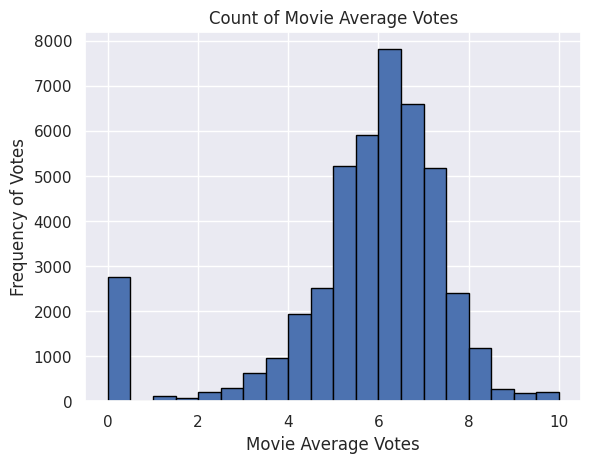

In [ ]:
# Plotting a histogram to understand the number of Movie average votes from 0 to 10
plt.hist(movie_data['vote_average'], bins=20, edgecolor = 'black')
plt.xlabel('Movie Average Votes')
plt.ylabel('Frequency of Votes')
plt.title('Count of Movie Average Votes')
plt.show()

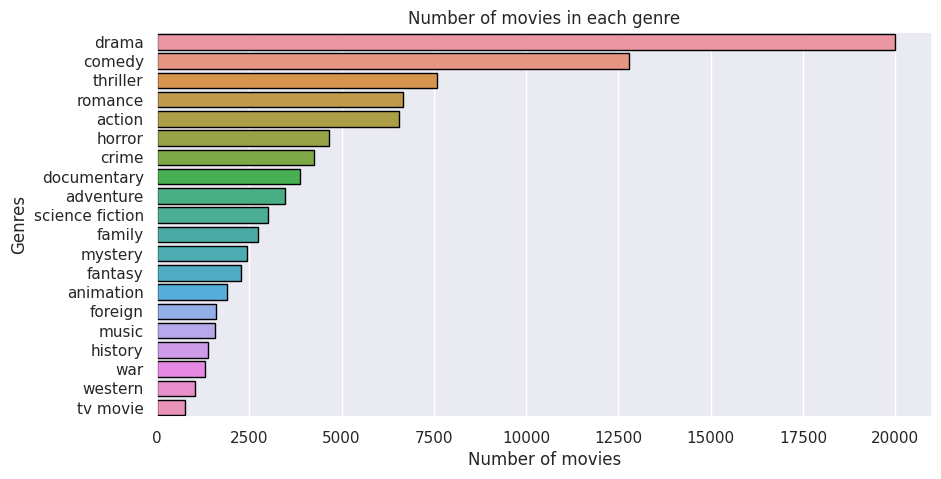

In [ ]:
# Plotting a horizontal bar chart to understand the number of movies in all the genres
exploded_movie_data = movie_data.explode('genres')
genres_desc = exploded_movie_data['genres'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=genres_desc.values, y=genres_desc.index, edgecolor = 'black')
plt.xlabel('Number of movies')
plt.ylabel('Genres')
plt.title('Number of movies in each genre')
plt.show()

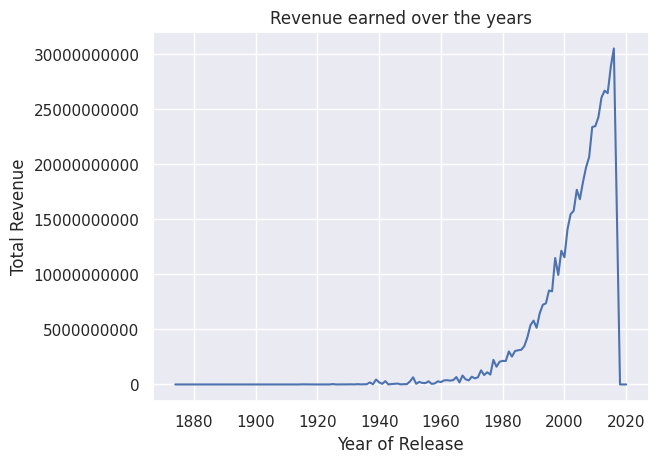

In [ ]:
# Plotting a line graph to understand how much revenue was earned from movies over the years
plt.plot(movie_data.groupby('year_of_release')['revenue'].sum())
plt.xlabel('Year of Release')
plt.ylabel('Total Revenue')
plt.title('Revenue earned over the years')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

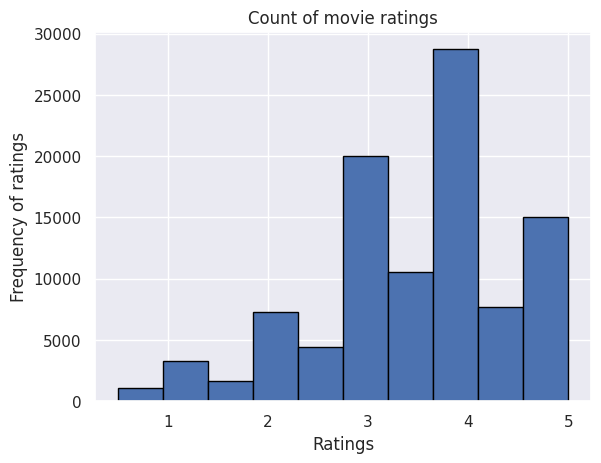

In [ ]:
# Plotting a histogram to understand the count of movie ratings from 0.5 to 5
plt.hist(rating_data['rating'], bins=10, edgecolor = 'black')
plt.xlabel('Ratings')
plt.ylabel('Frequency of ratings')
plt.title('Count of movie ratings')
plt.show()

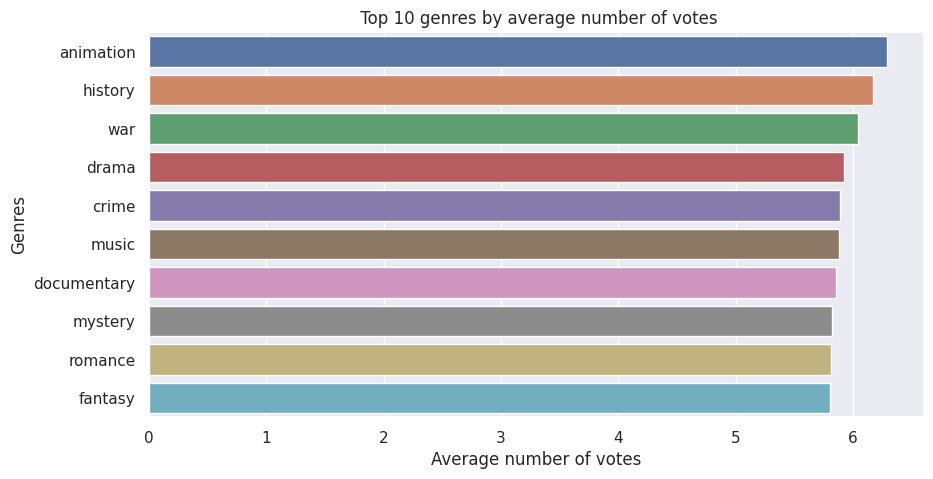

In [ ]:
# Plotting a horizontal bar chart to list the top 10 genres based on average number of votes for each genre
top_voted = exploded_movie_data.groupby('genres')['vote_average'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=top_voted.values, y=top_voted.index)
plt.xlabel('Average number of votes')
plt.ylabel('Genres')
plt.title(' Top 10 genres by average number of votes')
plt.show()

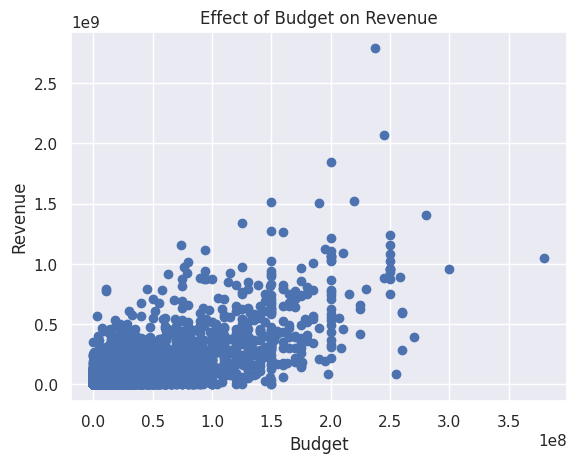

In [ ]:
# Plotting a scatter plot to understand if the budget has any effect on the revenue
plt.scatter(movie_data['budget'], movie_data['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Effect of Budget on Revenue')
plt.show()

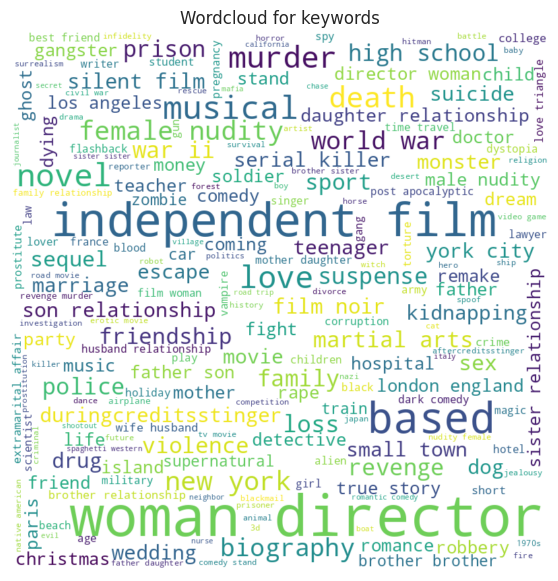

In [ ]:
# Plotting a wordcloud to better understand the different themes of all the movies
all_keywords = ' '.join(movie_data['keywords'].fillna(''))
wordcloud = WordCloud(width=800, height=800, background_color='white', regexp=r"\w[\w']+\b").generate(all_keywords)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for keywords')
plt.show()

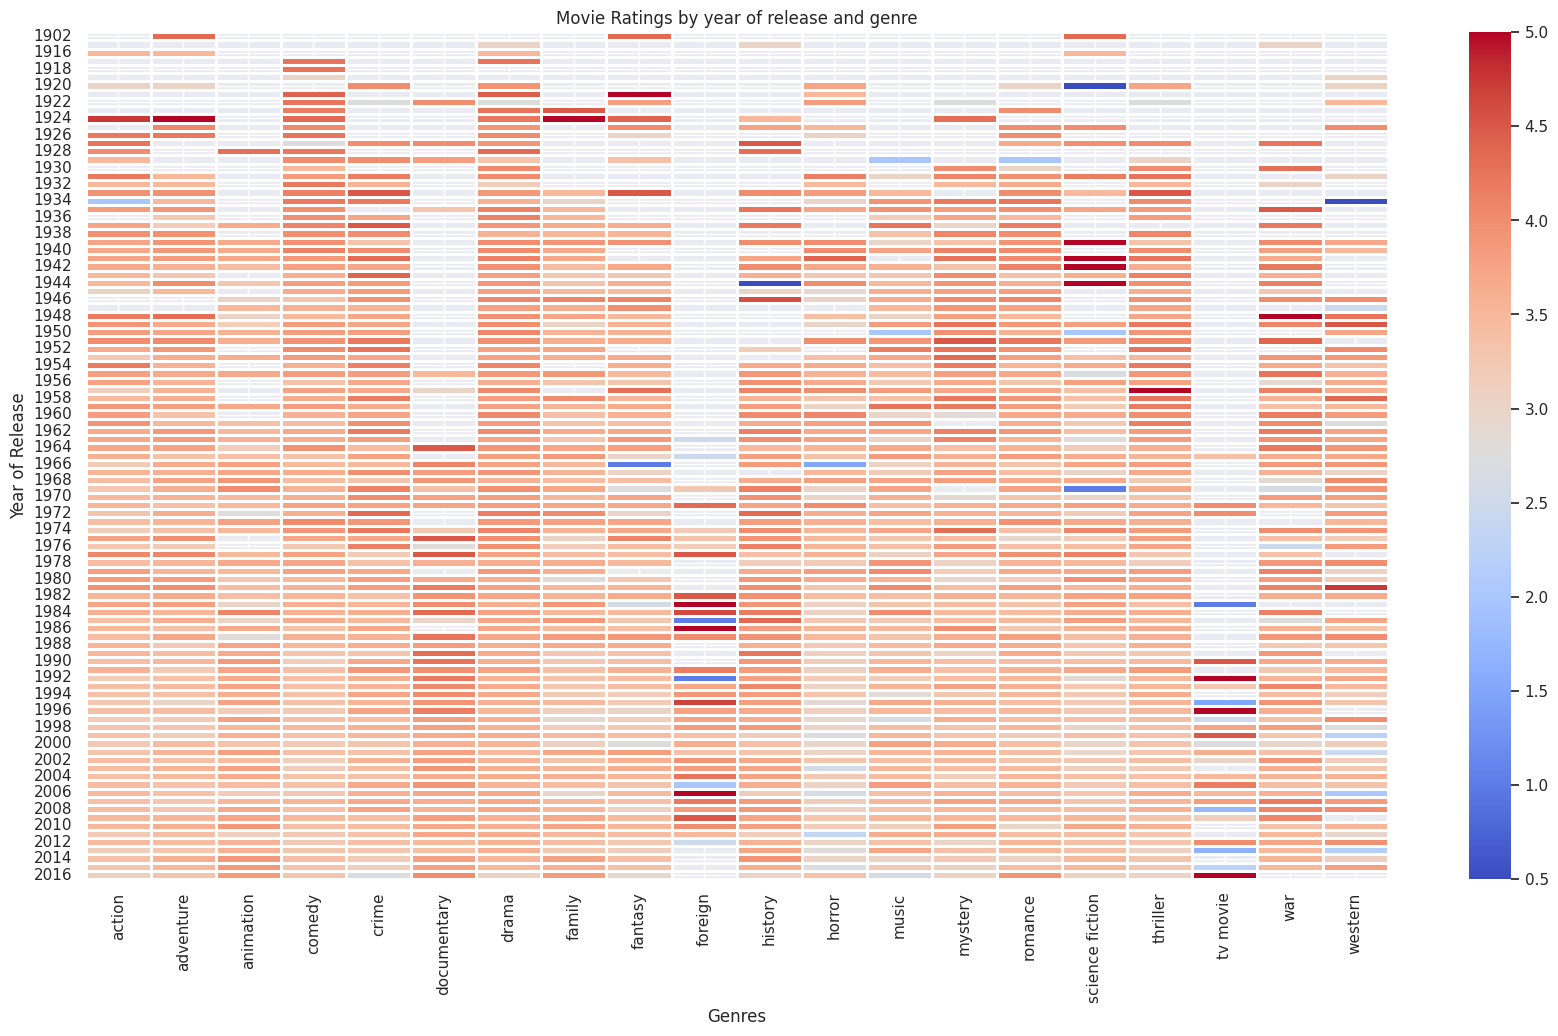

In [ ]:
# Plotting a heatmap to understand how the ratings given by different users fluctuates every year in each genre
ratings_pivot = rating_data.merge(exploded_movie_data, on='tmdbId').pivot_table(index='year_of_release', columns='genres', values='rating', aggfunc='mean')
sns.set(font_scale=1)
plt.figure(figsize=(21,11))
sns.heatmap(ratings_pivot, cmap='coolwarm', linecolor='white', linewidths=1)
plt.xlabel('Genres')
plt.ylabel('Year of Release')
plt.title('Movie Ratings by year of release and genre')
plt.show()

# NON-SYMBOLIC AI



In [ ]:
# Making a copy of both of our final dataframes: movie_data and rating_data
copy_movie = movie_data.copy()
copy_rating = rating_data.copy()

In [ ]:
# Extracting only the 'tmdbId' column from the rating_data dataframe to reduce its size
# rating_tmdbId = copy_rating['tmdbId']

In [ ]:
# Extracting movies data from the copy_movie dataframe that have been watched and rated by users in the rating_tmdbId dataframe
# (Based on tmdbId)
# Reason - This is done because of the availability of less computational resources
match_tmdbId = copy_movie[copy_movie['tmdbId'].isin(copy_rating['tmdbId'])]
# Displaying the dimension of the dataframe
match_tmdbId.shape

(9013, 26)

In [ ]:
# Resetting the index of the match_tmdbId dataframe and displaying the summary
match_tmdbId = match_tmdbId.reset_index(drop=True)
match_tmdbId.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9013 entries, 0 to 9012
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 9013 non-null   bool          
 1   budget                9013 non-null   float64       
 2   genres                9013 non-null   object        
 3   tmdbId                9013 non-null   int64         
 4   imdb_id               9013 non-null   object        
 5   original_language     9013 non-null   object        
 6   original_title        9013 non-null   object        
 7   overview              9013 non-null   object        
 8   popularity            9013 non-null   float64       
 9   poster_path           9013 non-null   object        
 10  production_companies  9013 non-null   object        
 11  production_countries  9013 non-null   object        
 12  release_date          9013 non-null   datetime64[ns]
 13  revenue           

In [ ]:
# Creating a new column called 'detailed_summary' by concatenating two columns - 'overview' & 'tagline'
match_tmdbId['detailed_summary'] = match_tmdbId['overview'] + match_tmdbId['tagline']

In [ ]:
# Printing the dimension of match_tmdbId dataframe
match_tmdbId.shape

(9013, 27)

In [ ]:
# Listing top 5 values in our match_tmdbId dataframe
match_tmdbId.head()

,adult,budget,genres,tmdbId,imdb_id,original_language,original_title,overview,popularity,poster_path,...,tagline,title,vote_average,vote_count,year_of_release,keywords,cast,director,Writer,detailed_summary
0,False,30000000.0,"[animation, comedy, family]",862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,tt0114709,...,unknown,toy story,7.7,5415.0,1995,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","[tom hanks, tim allen, don rickles, jim varney...","['tom hanks', 'tim allen', 'don rickles', 'jim...","['tom hanks', 'tim allen', 'don rickles', 'jim...","led by woody, andy's toys live happily in his ..."
1,False,65000000.0,"[adventure, fantasy, family]",8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,tt0113497,...,roll the dice and unleash the excitement!,jumanji,6.9,2413.0,1995,"['board game', 'disappearance', ""based on chil...","[robin williams, jonathan hyde, kirsten dunst,...","['robin williams', 'jonathan hyde', 'kirsten d...","['robin williams', 'jonathan hyde', 'kirsten d...",when siblings judy and peter discover an encha...
2,False,0.0,"[romance, comedy]",15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,tt0113228,...,still yelling. still fighting. still ready for...,grumpier old men,6.5,92.0,1995,"['fishing', 'best friend', 'duringcreditssting...","[walter matthau, jack lemmon, ann-margret, sop...","['walter matthau', 'jack lemmon', 'ann-margret...","['walter matthau', 'jack lemmon', 'ann-margret...",a family wedding reignites the ancient feud be...
3,False,16000000.0,"[comedy, drama, romance]",31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,tt0114885,...,friends are the people who let you be yourself...,waiting to exhale,6.1,34.0,1995,"['based on novel', 'interracial relationship',...","[whitney houston, angela bassett, loretta devi...","['whitney houston', 'angela bassett', 'loretta...","['whitney houston', 'angela bassett', 'loretta...","cheated on, mistreated and stepped on, the wom..."
4,False,0.0,[comedy],11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,tt0113041,...,just when his world is back to normal... he's ...,father of the bride part ii,5.7,173.0,1995,"['baby', 'midlife crisis', 'confidence', 'agin...","[steve martin, diane keaton, martin short, kim...","['steve martin', 'diane keaton', 'martin short...","['steve martin', 'diane keaton', 'martin short...",just when george banks has recovered from his ...


In [ ]:
# Preprocessing the 'detailed_summary' in the match_tmdbId DataFrame using the TfidfVectorizer to create a matrix of TF-IDF features
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tf_idf_matrix = tf.fit_transform(match_tmdbId['detailed_summary'])

In [ ]:
# Checking the dimension of the the tf_idf_matrix
tf_idf_matrix.shape

(9013, 267935)

In [ ]:
# Computing the pairwise cosine similarity between all pairs of detailed_summary in the match_tmdbId by using the TF-IDF features
cosine_similarity = linear_kernel(tf_idf_matrix, tf_idf_matrix)

In [ ]:
# Returning the first row of the cosine similarity matrix
cosine_similarity[0]

array([1.        , 0.00672829, 0.        , ..., 0.        , 0.00121108,
       0.00474124])

In [ ]:
# Resetting the index and creating two lookup tables to prepare the match_tmdbId DataFrame for usage in a recommendation system:
# 1. One that points the original DataFrame indices to movie titles
# 2. Second that points movie names to their respective DataFrame indices
match_tmdbId = match_tmdbId.reset_index()
movie_title = match_tmdbId['title']
movie_index = pd.Series(match_tmdbId.index, index=match_tmdbId['title'])

### Similar Movie Recommendations with Test Cases

In [ ]:
# Defining the retrieve_recommendations(title) function - to retrieve Movies similar to a given title
# The function gets a movie title as input and returns a list of the top 5 most similar movies based on their cosine similarity scores.
def retrieve_recommendations(title):
     ind = movie_index[title]
     sim_scores = list(enumerate(cosine_similarity[ind]))
     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
     sim_scores = sim_scores[1:31]
     movie_index_new = [y[0] for y in sim_scores]
     # return movie_title.iloc[movie_index_new]
     return movie_index_new

In [ ]:
# Test case 1 for non-symbolic AI part: - Movies similar to 'The Dark Knight'
movie_title.iloc[retrieve_recommendations('The Dark Knight'.lower())].head(5)

7895                      the dark knight rises
132                              batman forever
1110                             batman returns
8189    batman: the dark knight returns, part 2
7531                 batman: under the red hood
Name: title, dtype: object

In [ ]:
# Test case 2 for non-symbolic AI part: - Movies similar to 'Toy Story'
movie_title.iloc[retrieve_recommendations('Toy Story'.lower())].head(5)

2496               toy story 2
7501               toy story 3
6168    the 40 year old virgin
2541           man on the moon
6597              factory girl
Name: title, dtype: object

In [ ]:
# Test case 3 for non-symbolic AI part: - Movies similar to 'Insidious'
movie_title.iloc[retrieve_recommendations('The Dark Knight'.lower())].head(5)

7895                      the dark knight rises
132                              batman forever
1110                             batman returns
8189    batman: the dark knight returns, part 2
7531                 batman: under the red hood
Name: title, dtype: object

### Improved Similar Movie Recommendations by using vote count and vote average



In [ ]:
# Defining the retrieve_improved_recommendations(title) function - to retrieve Movies similar to a given title
# This is done based on a weighted_rating that is calculated from vote_count and vote_average
# The function gets a movie title as input and returns a list of the top 5 most similar movies based on their cosine similarity scores.
movie_vote_count = copy_movie['vote_count']
movie_vote_average = copy_movie['vote_average']
mean_value = movie_vote_average.mean()
quantile_value = movie_vote_count.quantile(0.95)

def weighted_rating(x):
    v_c = x['vote_count']
    v_a = x['vote_average']
    return (v_c/(v_c+quantile_value) * v_a) + (quantile_value/(quantile_value+v_c) * mean_value)

def retrieve_improved_recommendations(title):
    movie_index_new = retrieve_recommendations(title)
    movies = match_tmdbId.iloc[movie_index_new][['tmdbId','title', 'genres','cast',
                                                 'director','spoken_languages', 'vote_count', 'vote_average', 'year_of_release']]
    movie_vote_count = movies['vote_count']
    movie_vote_average = movies['vote_average']
    mean_value = movie_vote_average.mean()
    quantile_value = movie_vote_count.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= quantile_value) & (movies['vote_count']) & (movies['vote_average'])]
    qualified['vote_count'] = qualified['vote_count']
    qualified['vote_average'] = qualified['vote_average']
    qualified['weighted_rating'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('weighted_rating', ascending=False).head(5)
    return qualified

In [ ]:
# Test case 4 for non-symbolic AI - Displaying the top 5 improved recommendations for the movie The Dark Knight
retrieve_improved_recommendations('The Dark Knight'.lower())

,tmdbId,title,genres,cast,director,spoken_languages,vote_count,vote_average,year_of_release,weighted_rating
7895,49026,the dark knight rises,"[action, crime, drama, thriller]","[christian bale, michael caine, gary oldman, a...","['christian bale', 'michael caine', 'gary oldm...",[english],9263.0,7.6,2012,7.509970
6120,272,batman begins,"[action, crime, drama]","[christian bale, michael caine, liam neeson, k...","['christian bale', 'michael caine', 'liam nees...","[english, اردو, 普通话]",7511.0,7.5,2005,7.395766
7897,58574,sherlock holmes: a game of shadows,"[adventure, action, crime, mystery]","[robert downey jr., jude law, jared harris, no...","['robert downey jr.', 'jude law', 'jared harri...",[english],3971.0,7.0,2011,6.862835
7311,22803,law abiding citizen,"[drama, crime, thriller]","[jamie foxx, gerard butler, colm meaney, bruce...","['jamie foxx', 'gerard butler', 'colm meaney',...",[english],1522.0,7.2,2009,6.846828
523,268,batman,"[fantasy, action]","[jack nicholson, michael keaton, kim basinger,...","['jack nicholson', 'michael keaton', 'kim basi...","[english, français]",2145.0,7.0,1989,6.766205


In [ ]:
# Test case 5 for non-symbolic AI - Displaying the top 5 improved recommendations for the movie Toy Story
retrieve_improved_recommendations('Toy Story'.lower())

,tmdbId,title,genres,cast,director,spoken_languages,vote_count,vote_average,year_of_release,weighted_rating
7501,10193,toy story 3,"[animation, family, comedy]","[tom hanks, tim allen, ned beatty, joan cusack...","['tom hanks', 'tim allen', 'ned beatty', 'joan...","[english, español]",4710.0,7.6,2010,7.430484
2496,863,toy story 2,"[animation, comedy, family]","[tom hanks, tim allen, joan cusack, kelsey gra...","['tom hanks', 'tim allen', 'joan cusack', 'kel...",[english],3914.0,7.3,1999,7.130292
991,696,manhattan,"[comedy, drama, romance]","[woody allen, diane keaton, michael murphy, ma...","['woody allen', 'diane keaton', 'michael murph...",[english],600.0,7.8,1979,6.879660
6264,116,match point,"[drama, thriller, crime, romance]","[jonathan rhys meyers, scarlett johansson, emi...","['jonathan rhys meyers', 'scarlett johansson',...",[english],1134.0,7.2,2005,6.760154
886,221,rebel without a cause,[drama],"[james dean, natalie wood, sal mineo, ann dora...","['james dean', 'natalie wood', 'sal mineo', 'a...",[english],351.0,7.6,1955,6.504516


In [ ]:
# Test case 6 for non-symbolic AI - Displaying the top 5 improved recommendations for the movie Insidious
retrieve_improved_recommendations('Insidious'.lower())

,tmdbId,title,genres,cast,director,spoken_languages,vote_count,vote_average,year_of_release,weighted_rating
4394,8392,my neighbor totoro,"[fantasy, animation, family]","[noriko hidaka, hitoshi takagi, chika sakamoto...","['noriko hidaka', 'hitoshi takagi', 'chika sak...",[日本語],1730.0,8.0,1988,7.516309
1522,2108,the breakfast club,"[comedy, drama]","[emilio estevez, anthony michael hall, judd ne...","['emilio estevez', 'anthony michael hall', 'ju...",[english],2189.0,7.8,1985,7.434448
7225,767,harry potter and the half-blood prince,"[adventure, fantasy, family]","[daniel radcliffe, rupert grint, emma watson, ...","['daniel radcliffe', 'rupert grint', 'emma wat...",[english],5435.0,7.4,2009,7.266577
3687,1933,the others,"[horror, drama, mystery, thriller]","[nicole kidman, christopher eccleston, alakina...","['nicole kidman', 'christopher eccleston', 'al...","[français, english]",1708.0,7.4,2001,7.035826
8992,259693,the conjuring 2,[horror],"[patrick wilson, vera farmiga, madison wolfe, ...","['patrick wilson', 'vera farmiga', 'madison wo...",[english],2018.0,7.0,2016,6.754160


# INFERENCING
The knowledge inference on the movie dataset involved applying logical reasoning and inference mechanisms to draw conclusions, make predictions, or generate recommendations based on the available knowledge. This process utilized the structured knowledge representation of the dataset and applied logical rules, algorithms, or machine learning techniques to infer new information or make connections between existing knowledge elements. The inference mechanisms analyzed patterns, relationships, and dependencies within the dataset to generate insights, classify movies, identify similarities, or predict user preferences. By leveraging knowledge inference, the system could provide personalized and accurate recommendations based on the user's input or historical data, enhancing the effectiveness of the movie recommendation system.

# SYMBOLIC AI


In [ ]:
# Creating a rules_list() and listing all the rules
def rules_list():
    rules = [
      {
          "condition": "genre not found",
          "action": "Sorry, we couldn't find any movies that match your preferred genre."
      },
      {
          "condition": "actor not found",
          "action": "Sorry, we couldn't find any movies featuring your preferred actor/actress."
      },
      {
          "condition": "director not found",
          "action": "Sorry, we couldn't find any movies directed by your preferred director."
      },
      {
          "condition": "language not found",
          "action": "Sorry, we couldn't find any movies in your preferred language."
      },
      {
          "condition": "movie found",
          "action": "Recommended movie title: "
      }
    ]
    return rules

In [ ]:
# Defining a function called returning_user() to handle recommendations for returning or old users
def returning_user():
  rules = rules_list()
  def match_rule(userId, preferred_genre, preferred_actor, preferred_director, preferred_spoken_languages):
      user_ratings = copy_rating[copy_rating['userId'] == userId]
      filtered_movies = match_tmdbId[
      (match_tmdbId['genres'].apply(lambda x: preferred_genre in x)) &
      (
          (match_tmdbId['cast'].apply(lambda x: any([actor in x for actor in preferred_actor]))) |
          (match_tmdbId['director'].str.contains(preferred_director)) |
          (match_tmdbId['spoken_languages'].apply(lambda x: any([lang in x for lang in preferred_spoken_languages])))

      )
      ]

      if filtered_movies.empty:
          if not match_tmdbId['genres'].apply(lambda x: preferred_genre in x).any():
              return rules[0]["action"]
          elif not match_tmdbId['cast'].apply(lambda x: preferred_actor in x).any():
              return rules[1]["action"]
          elif not match_tmdbId['director'].str.contains(preferred_director).any():
              return rules[2]["action"]
          elif not match_tmdbId['spoken_languages'].apply(lambda x: preferred_spoken_languages in x).any():
              return rules[3]["action"]
      else:

          user_watched_movies = user_ratings.merge(match_tmdbId, left_on='tmdbId', right_on='tmdbId')
          filtered_movies_with_ratings = filtered_movies.merge(user_watched_movies[['tmdbId', 'rating']], on='tmdbId', how='left')


          filtered_movies_with_ratings['rating'] = filtered_movies_with_ratings['rating'].fillna(0)


          recommended_movie = filtered_movies_with_ratings.sort_values(by=['rating', 'popularity'], ascending=[False, False]).iloc[0]

          return rules[4]["action"], recommended_movie


  user_id = int(input("Enter your user ID: "))
  genre_preference = input("Enter your genre preference: ").lower()
  actor_preference = input("Enter your actor preference: ").lower()
  director_preference = input("Enter your director preference: ").lower()
  language_preference = input("Enter your language preference: ").lower()
  action = match_rule(user_id, genre_preference, actor_preference, director_preference, language_preference)
  top_movie = action[1]
  return top_movie

In [ ]:
# Defining a function called new_user() to handle the recommendations for new or upcoming users
def new_user():
    rules = rules_list()
    def rule_match(preferred_genre, preferred_actor, preferred_director, preferred_spoken_languages):
      filtered_movies = copy_movie[
          (copy_movie['genres'].apply(lambda x: preferred_genre in x)) &
          (
          (copy_movie['cast'].apply(lambda x: any(actor in x for actor in preferred_actor) if isinstance(x, list) else False)) |
          (copy_movie['director'].str.contains(preferred_director)) |
          (copy_movie['spoken_languages'].apply(lambda x: any([lang in x for lang in preferred_spoken_languages])))
          )
      ]
      if filtered_movies.empty:
        if not match_tmdbId['genres'].apply(lambda x: preferred_genre in x).any():
            return rules[0]["action"]
        elif not match_tmdbId['cast'].apply(lambda x: preferred_actor in x).any():
            return rules[1]["action"]
        elif not match_tmdbId['director'].str.contains(preferred_director).any():
            return rules[2]["action"]
        elif not match_tmdbId['spoken_languages'].apply(lambda x: preferred_spoken_languages in x).any():
            return rules[3]["action"]
      else:

        recommended_movie = filtered_movies.sort_values(by='popularity', ascending=False).iloc[0]
        return rules[4]["action"], recommended_movie
    genre_preference = input("Enter your genre preference: ").lower()
    actor_preference = input("Enter your actor preference: ").lower()
    director_preference = input("Enter your director preference: ").lower()
    language_preference = input("Enter your language preference: ").lower()
    action = rule_match(genre_preference, actor_preference, director_preference, language_preference)
    top_movie = action[1]
    return top_movie

In [ ]:
# Defining a function called movie_poster() to display the movie posters of the top 5 recommendations
def movie_poster(list_of_movies):

    TMDB_API_KEY = '7bdc597a348c9f74c49d3ab9c1232573'
    list_of_5_movies = list_of_movies
    html = "<table><tr>"
    with requests.Session() as session:
        for _, movie in list_of_movies.iterrows():
            movie_id = movie['tmdbId']

            url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={TMDB_API_KEY}"
            response = session.get(url)

            if response.status_code == 200:
                movie_data = response.json()
                poster_path = movie_data['poster_path']
                img_url = f"https://image.tmdb.org/t/p/w500{poster_path}"
                img_response = session.get(img_url)

                if img_response.status_code == 200:
                    img = Image.open(BytesIO(img_response.content))
                    html += f"<td><img src='{img_url}' width='100' height='150' alt='Movie Poster'></td>"
                else:
                    print(f"Error fetching movie poster for movie id {movie_id}.")
            else:
                print(f"Error fetching movie details for movie id {movie_id}.")

        html += "</tr></table>"

        print("\nMovie Posters of the Top 5 recommended movies for the new user:\n")
        display(HTML(html))


In [ ]:
# Defining a function called display_logo() to give credits for using tmdb API for getting the movie posters
def display_logo():
    logo_url = "https://www.themoviedb.org/assets/2/v4/logos/v2/blue_square_2-d537fb228cf3ded904ef09b136fe3fec72548ebc1fea3fbbd1ad9e36364db38b.svg"
    logo_response = requests.get(logo_url)

    if logo_response.status_code == 200:
        svg_data = logo_response.content
        png_bytes = BytesIO()
        cairosvg.svg2png(bytestring=svg_data, write_to=png_bytes)
        png_bytes.seek(0)
        img = Image.open(png_bytes)
        display(img)
    else:
        print("Error fetching TMDb logo.")
    print("\nCredits: TMDB\n")
    print("\nThis product uses the TMDb API but is not endorsed or certified by TMDb.\n")


Would you like to test the recommendation system or exit? (Enter 'test' or 'exit'): test
Running the recommendation system...
Press 1 for new user and 2 for returning user:
Enter a value: 1
Enter your genre preference: animation
Enter your actor preference: tom hanks
Enter your director preference: tim allen
Enter your language preference: english

Top 5 recommended movies for the new user:
       tmdbId                  title                             genres  \
7501   10193            toy story 3        [animation, family, comedy]   
2496     863            toy story 2        [animation, comedy, family]   
991      696              manhattan           [comedy, drama, romance]   
6264     116            match point  [drama, thriller, crime, romance]   
886      221  rebel without a cause                            [drama]   

                                                   cast  \
7501  [tom hanks, tim allen, ned beatty, joan cusack...   
2496  [tom hanks, tim allen, joan cusack, 

,,,,


None


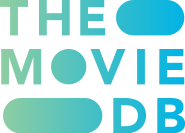


Credits: TMDB


This product uses the TMDb API but is not endorsed or certified by TMDb.

Would you like to test the recommendation system or exit? (Enter 'test' or 'exit'): test
Running the recommendation system...
Press 1 for new user and 2 for returning user:
Enter a value: 2
Enter your user ID: 1
Enter your genre preference: romance
Enter your actor preference: Philippe Noiret
Enter your director preference: Giuseppe Tornatore
Enter your language preference: italiano

Top 5 recommended movies for the returning user       tmdbId                        title                    genres  \
1113     621                       grease                 [romance]   
7853   71859  we need to talk about kevin         [drama, thriller]   
207      522                      ed wood  [comedy, drama, history]   
4342      64                  talk to her          [drama, romance]   
7013    4960         synecdoche, new york                   [drama]   

                                               

,,,,


None


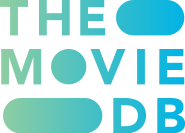


Credits: TMDB


This product uses the TMDb API but is not endorsed or certified by TMDb.

Would you like to test the recommendation system or exit? (Enter 'test' or 'exit'): exit
Exiting the system...


In [ ]:
# Finally, an Interactive approach to test our Hybrid Movie Recommendation System
while True:
    user_input = input("Would you like to test the recommendation system or exit? (Enter 'test' or 'exit'): ")
    if user_input.lower() == 'test':
        print("Running the recommendation system...")
        print("Press 1 for new user and 2 for returning user:")
        user_status = input("Enter a value: ")
        if user_status == '1':
          recommended_movie_title = new_user()
          recommended_movie_title_only = recommended_movie_title['title']
          retrieved_movies = retrieve_improved_recommendations(recommended_movie_title_only)
          print("\nTop 5 recommended movies for the new user:\n", retrieved_movies)
          print(movie_poster(retrieved_movies))
          display_logo()
        elif user_status == '2':
          recommended_movie_title = returning_user()
          recommended_movie_title_only = recommended_movie_title['title']
          retrieved_movies = retrieve_improved_recommendations(recommended_movie_title_only)
          print("\nTop 5 recommended movies for the returning user", retrieved_movies)
          print(movie_poster(retrieved_movies))
          display_logo()
        else:
          print("Invalid input. Please enter either '1' or '2'.")
    elif user_input.lower() == 'exit':
        print("Exiting the system...")
        break
    else:
        print("Invalid input. Please enter either 'test' or 'exit'.")

### Top 5 Recommedation - Explanation, Evaluation and Justification for both the new and old user

**For new or upcoming user:**
Actually what happens for new user here is when the user inputs the preferences of favorite genre, cast, director and spoken language (animation, tom hanks, tim allen and english), our system will check based on the preferences. First it will consider genre as an important entity and that it should hold true. Then one of the user's preferences of the cast, director and spoken language should hold true. The new_user() function does this job for us and it will generate a top movie title for that particular user (Symbolic AI) based on the popularity score. Finally the (non-symbolic AI) part in which the retrieve_improved_recommendations() function will help to list top 5 movies based on the calculated weighted_rating score. This is how the system responds to the new user. If you refer to the above output section of the code which has the test case for new user, it has recommended the best top 5 movies for the user. This has been cross-validated with the dataset.

**For returning or old user:**
For user here is when the user inputs the preferences of favorite genre, cast, director and spoken language (1, romance, Philippe Noiret,Giuseppe Tornatore and italiano), our system will check based on user's past rating history. First it will consider genre as an important entity and that it should hold true. Then one of the user's preferences of the cast, director and spoken language should hold true. The returning_user() function does this job for us and it will generate a top movie title for that particular user (Symbolic AI) based on the rating given by the user and the popularity score. Finally the (non-symbolic AI) part in which the retrieve_improved_recommendations() function will help to list top 5 movies based on the calculated weighted_rating score. So, this is how the system responds to the old user. If you refer to the above output section of the code which has the test case for old user, it has recommended the best top 5 movies for the user. This has been cross-validated with the dataset.


# OVERALL EXPLANATION
These movies were recommended due to their compelling taglines and intriguing overviews and then sorted a combination of their ratings, mean score of the vote average of each movie and a 0.60 quantile of the vote count. Each movie represents a different genre. They offer a diverse range of storytelling styles, captivating performances, and enduring popularity, making them highly appealing choices for movie enthusiasts seeking engaging and memorable cinematic experiences.

# OVERALL JUSTIFICATION
These movies were recommended based on a hybrid AI system that analysed user preferences, movie attributes, and similarity metrics. By considering factors such as genre, storyline, and popularity, the system identified movies with high compatibility and relevance. The recommendations aim to provide a personalized and satisfying movie-watching experience, aligning with user preferences and maximizing the likelihood of enjoyment and engagement.